In [1]:
using Plots

In [2]:
import Pkg; 
#Pkg.generate("Conf_Fluids")
Pkg.activate("Conf_Fluids")
Pkg.add("Symbolics")
Pkg.add("StaticArrays")
Pkg.add("SymbolicUtils")
using Symbolics
using StaticArrays
#using SymbolicUtils

 Activating environment at `~/Julia/Fluidos_Conformes/Conf_Fluids/Project.toml`
   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Project.toml`
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Manifest.toml`
  Resolving package versions...
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Project.toml`
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Manifest.toml`
  Resolving package versions...
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Project.toml`
No Changes to `~/Julia/Fluidos_Conformes/Conf_Fluids/Manifest.toml`


## Euler equations

We recuperate Euler's equations setting $\chi_1 = 0$ and the dissipative variables to zero. That way the systems decouple. And we get: (the notation here is a bit misleading,
here $\rho \approx e$ Different from $E = (\rho + p) = 4/3 \rho$, since $p = \frac{1}{3}\rho$ and so $s = Ev = 4/3 e v$

$F_e = \frac{4}{3}ργ^2v = s$

$F_s = \frac{4}{3}ρ(γ^2v^2 + \frac{1}{4}) = \frac{1}{3}ργ^2(4 v^2 + \frac{1}{\gamma^2}) = 
\frac{1}{3}ργ^2(3v^2 + 1) $

$e = \frac{4}{3}ρ(γ^2 - \frac{1}{4}) = \frac{1}{3}ργ^2(4 - \frac{1}{\gamma^2}) = \frac{1}{3}ργ^2(3 + v^2)$

$s = \frac{4}{3}ργ^2v$

$-4 e = s/v(3+v^2)$

$-4\frac{e}{s}v + (3 + v^2) = 0$

$v = (4x \pm \sqrt{16x^2 - 12})/2$

$v = 2\frac{e}{s} \pm \sqrt{4(\frac{e}{s})^2 -3}$

$v_- =  \frac{3}{2\frac{e}{s} + \sqrt{4(\frac{e}{s})^2 -3}} \approx \frac{3s}{4e}$


#e = 4//3*ρ*(γ^2 - 1/4) 
#s = 4//3*ρ*γ^2*v 

In [3]:
function F(f,c)
    μ = f[1]  # esto es -μ
    #T = (μ)^(-1//2) # use μ positive, so I changed μ -> -μ
    v = f[2]
    γ = (1 - v^2)^(-1//2)
    ρ = -6 / μ^2 
    #return  [γ; ρ] 
    return [- c[1] + 4//3* ρ*(γ^2 - 1/4) ; - c[2] + 4//3* ρ*γ^2*v]
end

F([1;0.5],[0.;0.])
F([0.20031384490471524; 0.20015692245235764],[0.;0.])

2-element Array{Float64,1}:
 -157.85116476856393
  -41.57151413063179

In [4]:
N=2


@variables flu[1:N], con[1:N], χ[1:3] #variables para manipulación algebraica
#@variables χ₀, χ₁, χ₂
#@variables 



(Num[flu₁, flu₂], Num[con₁, con₂], Num[χ₁, χ₂, χ₃])

In [5]:
F(flu,con);
eval(F([1;0.2],[0;0]))

2-element Array{Float64,1}:
 -6.333333333333334
 -1.666666666666667

In [6]:
JS = Symbolics.jacobian(F(flu,con),flu)

2×2 Array{Num,2}:
 (16//1)*flu₁*((flu₁^2)^-2)*(((1 - (flu₂^2))^(-1//2))^2 - 0.25)  …   (-16//1)*flu₂*((flu₁^2)^-1)*((1 - (flu₂^2))^(-2//1))
 (16//1)*flu₁*flu₂*((flu₁^2)^-2)*(((1 - (flu₂^2))^(-1//2))^2)       (-8//1)*((flu₁^2)^-1)*(((1 - (flu₂^2))^(-1//2))^2) - ((16//1)*(flu₂^2)*((flu₁^2)^-1)*((1 - (flu₂^2))^(-2//1)))

In [7]:
#JSinv_p = inv(JS);

In [8]:
#JSinv = simplify(JSinv_p);

In [9]:
#simplify(JS[1,1])

In [10]:
#simplify.(substitute.(JS, (Dict(flu[2]^2 => (1-1/γₐ^2)),)))

In [11]:
J_exp = Symbolics.build_function(JS, flu, con);

In [12]:
Jac = eval(J_exp[1]);

In [13]:
Jac(rand(2),rand(2))

2×2 Array{Float64,2}:
 777.702    -14.6918
  58.7397  -129.955

In [14]:
#F_exp  = Symbolics.build_function(F, flu, con, χ)

In [15]:
#Fac = eval(F_exp[1]);

In [16]:
function NR_step!(F, Jac, u0, y)
    u = u0 - Jac(u0,y) \ F(u0,y)
end

NR_step! (generic function with 1 method)

In [17]:
u0 = @SVector[1.0, 0.30]
y = F(u0,[0,0])

F(u0,y .+ 0.005.*rand(2));

Jac(u0, y .+ 0.005.*rand(2))

2×2 SArray{Tuple{2,2},Float64,2,4} with indices SOneTo(2)×SOneTo(2):
 13.5824    -5.7964
  5.27473  -10.5301

In [18]:
p = 1
ui = @SVector[1.0, 0.30]
NR_step!(F, Jac, u0, y)

2-element SArray{Tuple{2},Float64,1,2} with indices SOneTo(2):
 1.0
 0.3

In [19]:
#u0 = @SVector[1.0, 0.30, 3.0, 4.0, 3.0]
u0 = [1.0; 0.30]
for i ∈ 1:25
    u0 = NR_step!(F, Jac, u0, y)
end
println(u0)
println(F(u0,y))

[1.0, 0.3]
[0.0, 0.0]


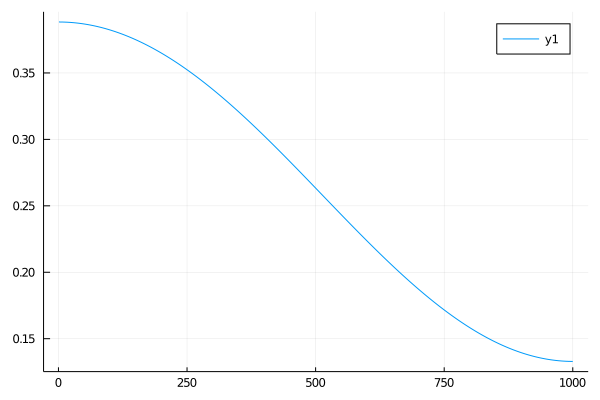

In [71]:
M = 10^3
flu0 = zeros(N,M)
con0 = zeros(N,M)
for j ∈ 1:M
    flu0[1,j] = 1.0 + 0.9* sin(π*j/(M+1))
    flu0[2,j] = 0.2 + 0.1* cos(π*j/(M+1))
    con0[:,j] = F(flu0[:,j],[0.,0.])#  + 0.1 * rand(N)
#    yy[:,j] = convert(Array{Float64,1},F(u0[:,j],yy[:,j],p))
end
flu0[:,2]
#con0[:,3]
plot(con0[2,:]./con0[1,:])
#plot(con0[2,:])

  0.053408 seconds (15.94 k allocations: 733.375 KiB)


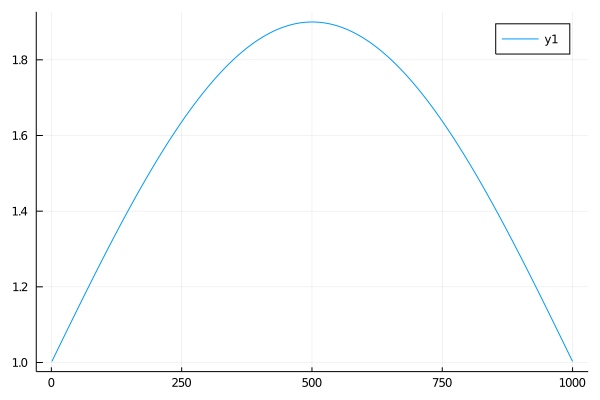

In [54]:
tol = 10^(-8)
iter_max = 10

@time begin
for j ∈ 1:M
    iter = 1
    while F(flu0[:,j],con0[:,j])'*F(flu0[:,j],con0[:,j]) > tol && iter < iter_max
        flu0[:,j] = NR_step!(F, Jac, flu0[:,j], con0[:,j])
        iter = iter + 1
    end
    #println(iter)
end
end
plot(flu0[1,:])

In [153]:
function direct_inversion(f,c)
    e = c[1] # 4//3* ρ*(γ^2 - 1//4)
    s = c[2] # 4//3* ρ*γ^2*v
    tol = 1.e-8
    x = s/e
    v = 3//2 * x / (1 + sqrt(1 - 3//4 * x^2))
    γ = (1 - v^2)^(-1//2)
    #e = 4//3* ρ*(γ^2 - 1/4)
    #ρ = -6 / μ^2
    ρ = 3//4 * e / (γ^2 - 1//4)
    μ = sqrt(-6/ρ)
    f[1] = -μ    
    f[2] = v
    return f[:]
end

direct_inversion (generic function with 2 methods)

In [154]:
flu1 = zeros(N,M)
for j ∈ 1:M
    flu1[:,j] = direct_inversion(flu1[:,j],con0[:,j])
end

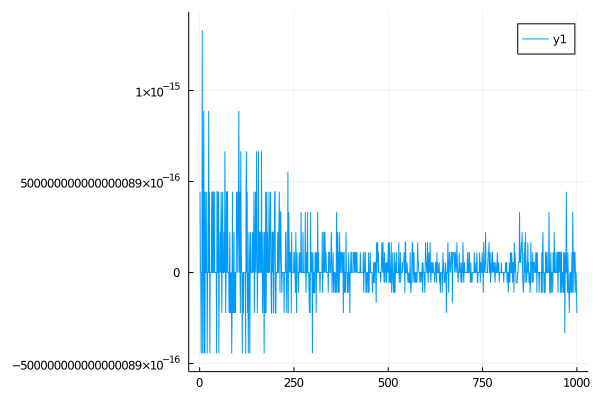

In [157]:
r = zeros(N,M)
for j ∈ 1:M
r[:,j] = F(flu1[:,j], con0[:,j])
end

plot(r[2,:])

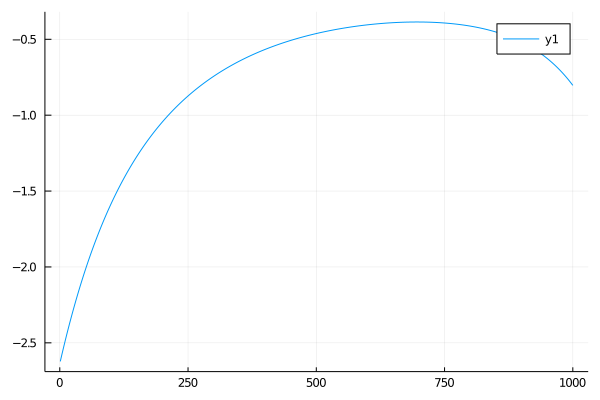

In [156]:
plot(con0[2,:])
#plot(flu0[2,:])